In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
PATH = "data/mckinsey/"

In [2]:
df_raw = pd.read_feather('tmp/mckinsey-raw')

In [3]:
train_cats(df_raw)

In [4]:
df, y, nas = proc_df(df_raw, 'Approved')

In [5]:
df_raw.Contacted.dtype

CategoricalDtype(categories=['N', 'Y'], ordered=True)

In [6]:
df_female = df[df['Gender']==1]

In [7]:
len(df_female)

29764

In [8]:
y_female = y[df['Gender']==1]

In [9]:
len(y_female[y_female==1])

248

In [10]:
len(df_female[df_female['Contacted']==2])

5326

In [11]:
count = 0
for i in range(len(df_female)):
    if(df_female.iloc[i].Contacted == 1 and y_female[i]==1):
        count+=1
count

173

In [12]:
n_valid = 10000  # same as Kaggle's test set size
n_trn = len(df_raw)-n_valid

In [13]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()


X_valid, X_train = split_vals(df_female, n_valid)
y_valid, y_train = split_vals(y_female, n_valid)

X_train.shape, y_train.shape, X_valid.shape

((19764, 28), (19764,), (10000, 28))

In [14]:
set_rf_samples(2000)
m = RandomForestRegressor(n_estimators=4000,max_features=0.1,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.1, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4000, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [15]:
y_pred = m.predict(X_valid)


In [16]:
fi = rf_feat_importance(m, X_train); fi[:30]

,cols,imp
18,DOBElapsed,0.127124
6,Monthly_Income,0.125188
3,Employer_Code,0.114982
21,Lead_Creation_Elapsed,0.088284
12,Existing_EMI,0.088078
1,City_Code,0.078111
7,Customer_Existing_Primary_Bank_Code,0.064421
20,Lead_Creation_Month,0.044629
4,Employer_Category1,0.034476
17,Var1,0.033130


In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,y_pred)

0.8583404737903226

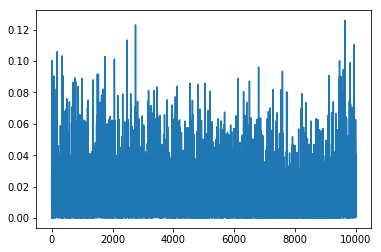

In [18]:
plt.plot(y_pred)

In [49]:
df_male = df[df['Gender']==2]

In [50]:
y_male = y[df['Gender']==2]

In [51]:
len(y_male)

39949

In [52]:
len(y_male[y_male==1])

772

In [55]:
df_male['avg'] = df_male.apply(lambda row: (row.Monthly_Income - row.c) / row.EMI, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_male = df_male.drop('Monthly_Income',axis=1)
df_male = df_male.drop('EMI',axis=1)
df_male = df_male.drop('Existing_EMI',axis=1)


In [57]:

X_valid, X_train = split_vals(df_male, n_valid)
y_valid, y_train = split_vals(y_male, n_valid)

X_train.shape, y_train.shape, X_valid.shape

((29949, 26), (29949,), (10000, 26))

In [58]:
df_male.head()

,Gender,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,...,Lead_Creation_Year,Lead_Creation_Month,Lead_Creation_Elapsed,Employer_Category2_na,Existing_EMI_na,Loan_Amount_na,Loan_Period_na,Interest_Rate_na,EMI_na,avg
1,2,3,1,1,3,1.0,2,2,2,1,...,2016,4,1459987200,False,False,False,False,False,False,3.672613
2,2,125,3,5127,3,4.0,3,1,2,16,...,2016,7,1468886400,False,False,False,False,True,True,2.391073
3,2,477,3,4080,1,4.0,3,1,2,16,...,2016,9,1473206400,False,False,False,False,True,True,3.719447
4,2,2,1,1776,1,4.0,1,2,2,8,...,2016,7,1468972800,False,False,False,False,True,True,7.970244
6,2,22,2,21786,2,4.0,3,1,2,1,...,2016,2,1454803200,False,False,False,False,False,False,2.433485


In [59]:
len(X_train[X_train['Contacted']==1])

0

In [ ]:
?RandomForestRegressor

In [72]:
set_rf_samples(9000)
m_male = RandomForestRegressor(n_estimators=400,max_features=0.5,n_jobs=-1, oob_score=True)
m_male.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [73]:
fi = rf_feat_importance(m_male, X_train); fi[:30]

,cols,imp
15,DOBElapsed,0.159228
25,avg,0.138753
3,Employer_Code,0.138704
18,Lead_Creation_Elapsed,0.088232
11,Loan_Amount,0.080966
1,City_Code,0.069996
6,Customer_Existing_Primary_Bank_Code,0.062730
13,Interest_Rate,0.050029
17,Lead_Creation_Month,0.034677
12,Loan_Period,0.034030


In [74]:
y_pred = m_male.predict(X_valid)

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,y_pred)

0.7388437021901822

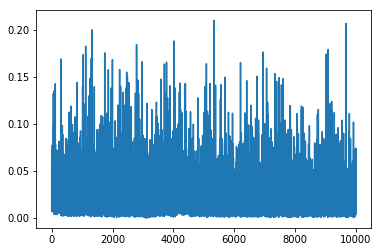

In [36]:
plt.plot(y_pred)

In [ ]:
y_pred[y_pred>=0.01]=1
y_pred[y_pred<0.01]=0

In [ ]:
len(y_pred[y_pred==1])

In [ ]:
y_pred_int_type = y_pred.astype(int)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_pred_int_type,y_valid,average='micro')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_int_type,y_valid)

In [ ]:
df_temp = pd.DataFrame()
for i in range(len(y_pred)):
    if(y_pred_int_type[i]==1 and y_valid[i]==1):
        df_temp = df_temp.append(X_valid.iloc[i])
df_temp

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [ ]:
display_all(df_temp)